<img align="right" style="max-width: 200px; height: auto" src="hsg_logo.png">

# Lab 07 - "Logistic Regression"

Introduction to AI and ML, University of St. Gallen, Autumn Term 2020

The lab environment of the **"Machine Learning"** course is powered by Jupyter Notebooks (https://jupyter.org), which allows one to perform a great deal of data analysis and statistical validation. In this lab, we will build our first customer churn predictor using a classification technique referred to as **Logistic Regression**. Please recall that Logistic Regression corresponds to the class of **discriminative** classifiers as distinguished in the following illustration: 

<img align="center" style="max-width: 600px; height: auto" src="classifiers.png">

(Courtesy: Intro to AI & ML lecture, Prof. Dr. Borth, University of St. Gallen)

The *discriminative* **Logistic Regression** classifier is a supervised machine learning model used for the estimation of a relationship (dependency) between dependent and independent variables. Regression has different applications such as:
>- Prediction
>- Forecasting
>- Trends identification
>- Modelling dependency
>- Data smoothing
>- Hypothesis testing

This lab builds in parts on the tutorial created by nitinkaushik01 on github. The original tutorial can be accessed via the following URL: https://github.com/nitinkaushik01/Deep_and_Machine_Learning_Projects/blob/master/Churn_Prediction_of_Customers/Customer_Churn_Prediction.ipynb

Further references in the *References* section at the end.

As always, please don't hesitate to ask all your questions either during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email).

## 1. Lab Objectives:

After today's lab, you should be able to:

> 1. Understand how a **Logistic Regression** classifier can be trained and evaluated.
> 2. Transform raw data from an excel sheet to a machine learning-friendly **dataframe**.
> 3. Train and evaluate discriminative **machine learning models** using Python's `scikit-learn` library.
> 4. Understand how to **evaluate** and **interpret** the classification results.

Before we start let's watch a motivational video:

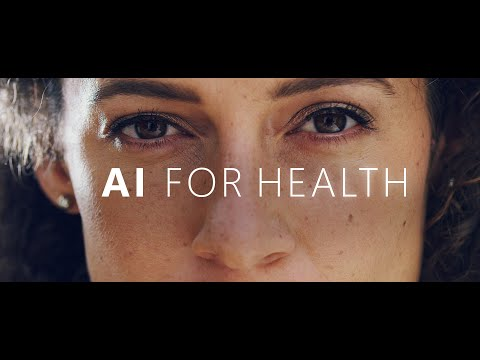

In [1]:
from IPython.display import YouTubeVideo
#Microsoft: "AI for Health Program"
YouTubeVideo('ii-FfE-7C-k', width=800, height=600)

## 2. Setup of the Analysis Environment

We need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [2]:
# import the numpy and pandas data science library
import pandas as pd
import numpy as np

# import data pre-processing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import Logistic Regression classifier library
from sklearn.linear_model import LogisticRegression

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Set random seed of all our experiments - this insures reproducibility.

In [3]:
random_seed = 42

Enable inline Jupyter notebook plotting:

In [4]:
%matplotlib inline

Use the 'Seaborn' plotting style in all subsequent visualizations:

In [5]:
plt.style.use('seaborn')

## 3. Logistic Regression Classification

### 3.1 Dataset Download and Data Assessment

The Telco Customer Churn Dataset encompasses information on clients of a Telecom company. Each row represents a customer, and each column contains customer’s attributes. The raw data contains 7043 rows (customers) and 21 columns (**features**). The “Churn” column is our target. If, for a given customer, Churn = *Yes*, it means the customer left the company.

 The dataset is available for free download via the following URL: https://www.kaggle.com/blastchar/telco-customer-churn.

The data includes information about:

1. Customers who left within the last month:
>- `Churn`

2. Services that each customer has signed up for:
>- `PhoneService`
>- `MultipleLines`
>- `InternetService`
>- `OnlineSecurity`
>- `OnlineBackup`
>- `DeviceProtection`
>- `TechSupport`
>- `StreamingTV`
>- `StreamingMovies`

3. Customer account information:
>- `customerID`
>- `tenure` (how long they've been a customer)
>- `Contract`
>- `PaymentMethod`
>- `PaperlessBilling`
>- `MonthlyCharges`
>- `TotalCharges`

4. Demographic info about customers:
>- `gender`
>- `SeniorCitizen`
>- `Partner`
>- `Dependents` (are they financially dependent on someone else)

These different features are the names of the columns, for which each customer (the lines) has a given value or state.


Let's load the dataset and conduct a preliminary data assessment: 

In [6]:
original_data = pd.read_csv("telco_customer_churn_dataset.csv")

See whether the size of the dataframe is as expected:

In [7]:
original_data.shape

(7043, 21)

Take a look at the different features (columns):

In [8]:
list(original_data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Print and inspect the top 10 feature rows of the dataset:

In [9]:
original_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


As can be seen from the dataframe, some features express their values in categorical terms, rather than in nominal terms. For instance, the `gender` column takes values `Female`/`Male`. Others take `Yes`/`No`, or even more specific values: the `PaymentMethod` column has `Mailed check`/`Bank transfer (automatic)`/`Credit card (automatic)`/`Electonic check` as values.

Our Logistic Regression model can only take in values that are numerical in order to process the numbers and make predictions. We therefore have to adjust the data to make it easier for our classifier.

Let's first verify exactly which features are expressed in numbers and which features are not:

In [10]:
# To get categorically valued features, take all columns with 'object' type
cats = list(original_data.select_dtypes(include=['object']).columns)

# To get numerically valued features, exclude all columns with 'object' type
nums = list(original_data.select_dtypes(exclude=['object']).columns)

# Print both lists
print('Categorical variables: {} \n'.format(cats))
print('Numerical variables: {}'.format(nums))

Categorical variables: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numerical variables: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


Looking at the dataframe, it looked like the `TotalCharges` column also contained some numerical values. To verify why it is not included in the numerical variables list, let's first verify how many unique values each column takes:

In [11]:
original_data[cats].nunique(axis=0)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

Ok, there are 7043 unique values for `customerID`, which makes sense. For the `TotalCharges`, there are 6531 different values - maybe there are a lot of occurences where the `TotalCharges` value for different customers is the same! Let's also verify if there are any instances where the value is missing (just filled by a space):

In [12]:
# Check how many values are filled with spaces for each column
original_data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We found 11 missing values in the TotalCharges column. To resolve this problem, we can either replace the missing data with substituted values (a process known as imputation), or simply drop them. We will do the latter in the preprocessing part.

Now let's verify what type of value the other categorical columns can take:

In [13]:
# Creating a list with all categorically valued columns except customerID and TotalCharges
cats = [cat for cat in cats if cat not in["customerID", "TotalCharges"]]

# Loop through the list and print all possible values for each element
for col in cats:
    print('{} : {}'.format(col, original_data[col].unique()))

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Great! Now we know exactly what type of value each column takes, and we discovered some null values in the `TotalCharges` column that we know we must drop.

Now, let's visualize the data a bit more before applying changes to it.

#### 3.1.1 Data Visualization

Let's use our 'cats' list (which contains all categorically expressed features except `TotalCharges` and `customerID`) and insert the `SeniorCitizen` feature in it. We can also use this `SeniorCitizen` feature for our visualizations because it can be seen as a categorical feature (Senior or Not Senior). We insert it in the 15th index so as to put it just before the Churn feature, which we want to keep last for our visualizations.

In [14]:
# Create this "if" clause to make sure the notebook does not run into any errors when re-running the code
if 'SeniorCitizen' not in cats:
  cats.insert(15,'SeniorCitizen')
else:
  pass

Now we can see how our different features look like:

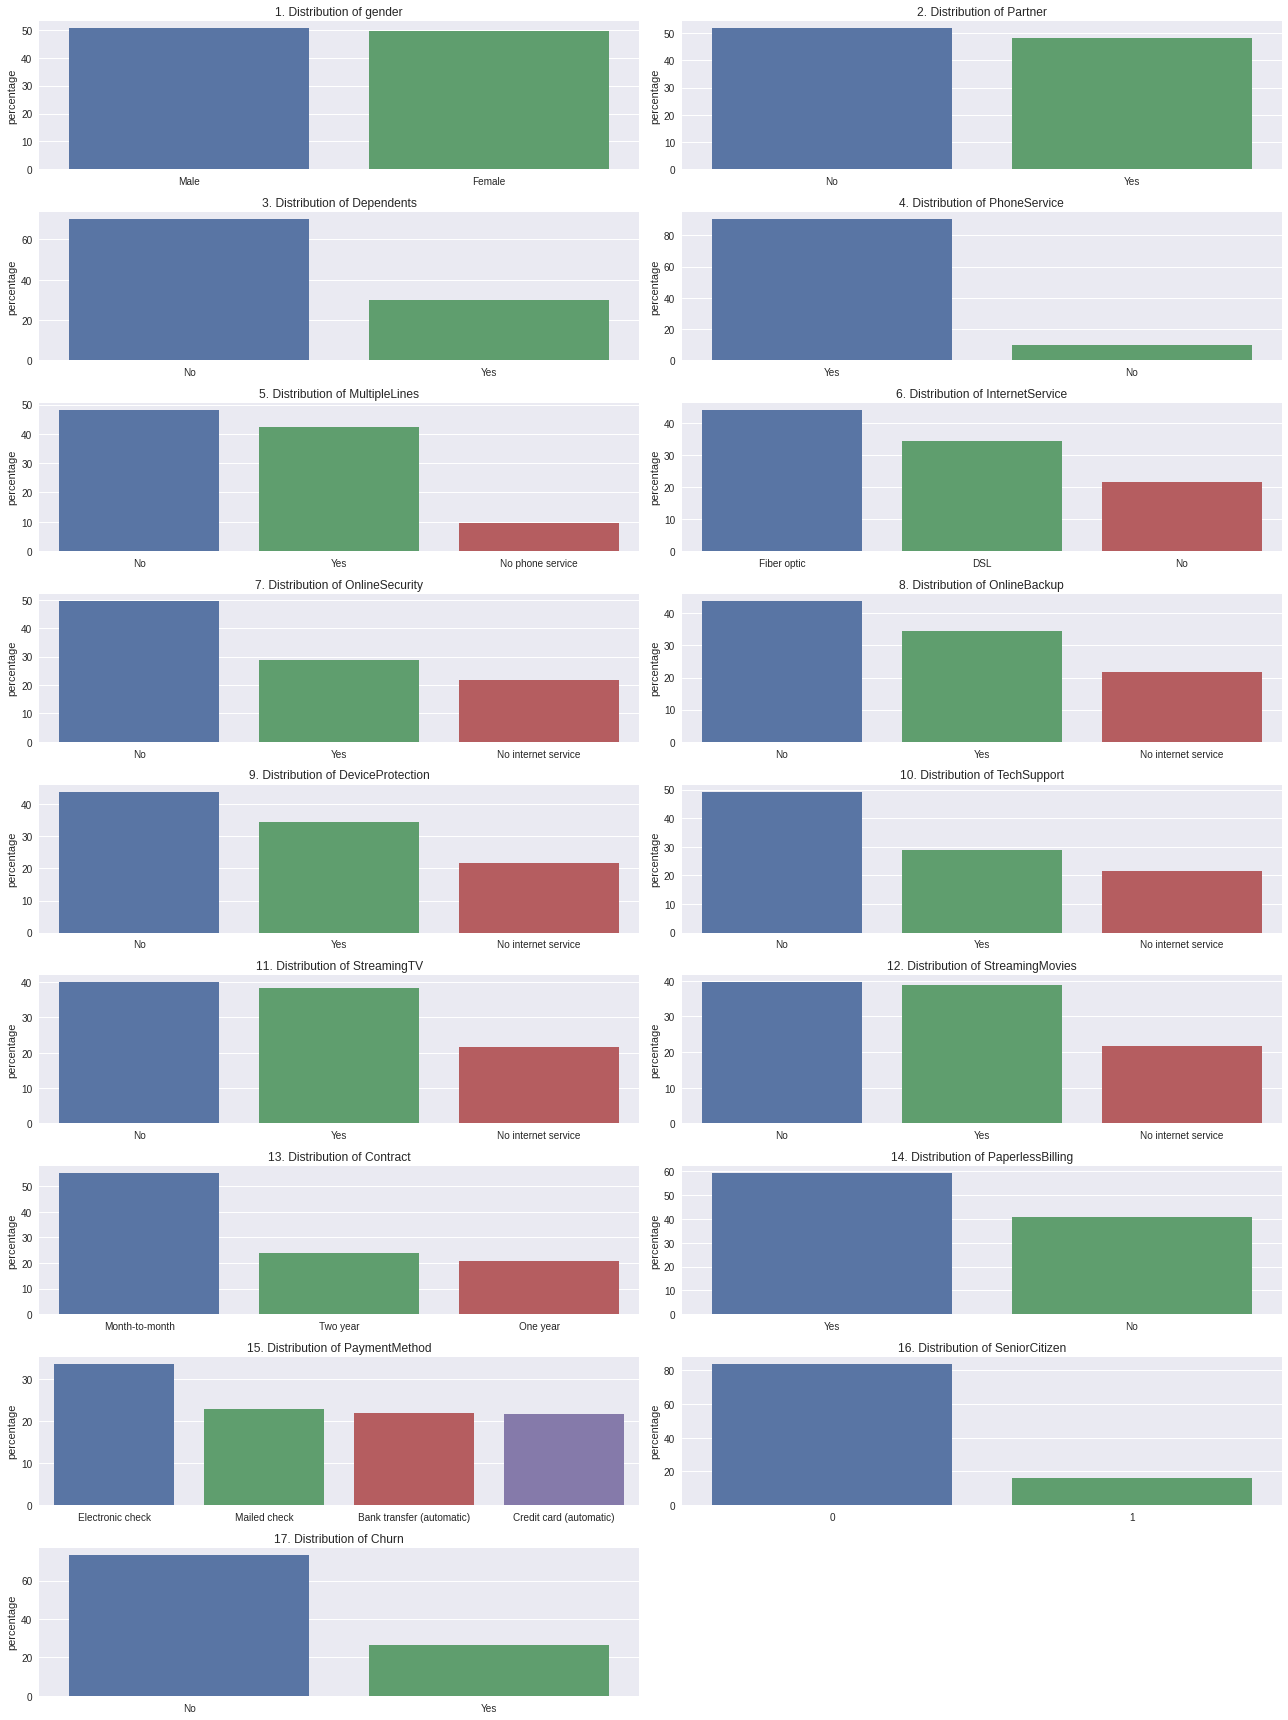

In [15]:
# Define a new figure and its size
fig = plt.figure(1, (18, 24))

# Loop through the "cats" list
for i,cat in enumerate(cats):
    # Create a subplot for the cat
    ax = plt.subplot(9,2,i+1)
    # Count the distribution in values for the cat, rename the axes labels and reset the cat's index
    v = original_data[cat].value_counts(normalize=True).rename("percentage").reset_index()
    # Use integers for the percentage
    v["percentage"] = v["percentage"] * 100
    # Create the bars for the plot with the data
    sns.barplot(x="index", y="percentage", data=v)
    # Set the label for the subplot's x-axis to None
    ax.set_xlabel(None)
    # Give a title to the subplot
    ax.set_title('{}. Distribution of {}'.format(i+1, cat))
    # Adjust the space (padding) between the subplots
    plt.tight_layout()

#Show the figure which contains all subplots
plt.show()

We can also examine how each feature is distributed with regards to its influence on the `Churn` column:

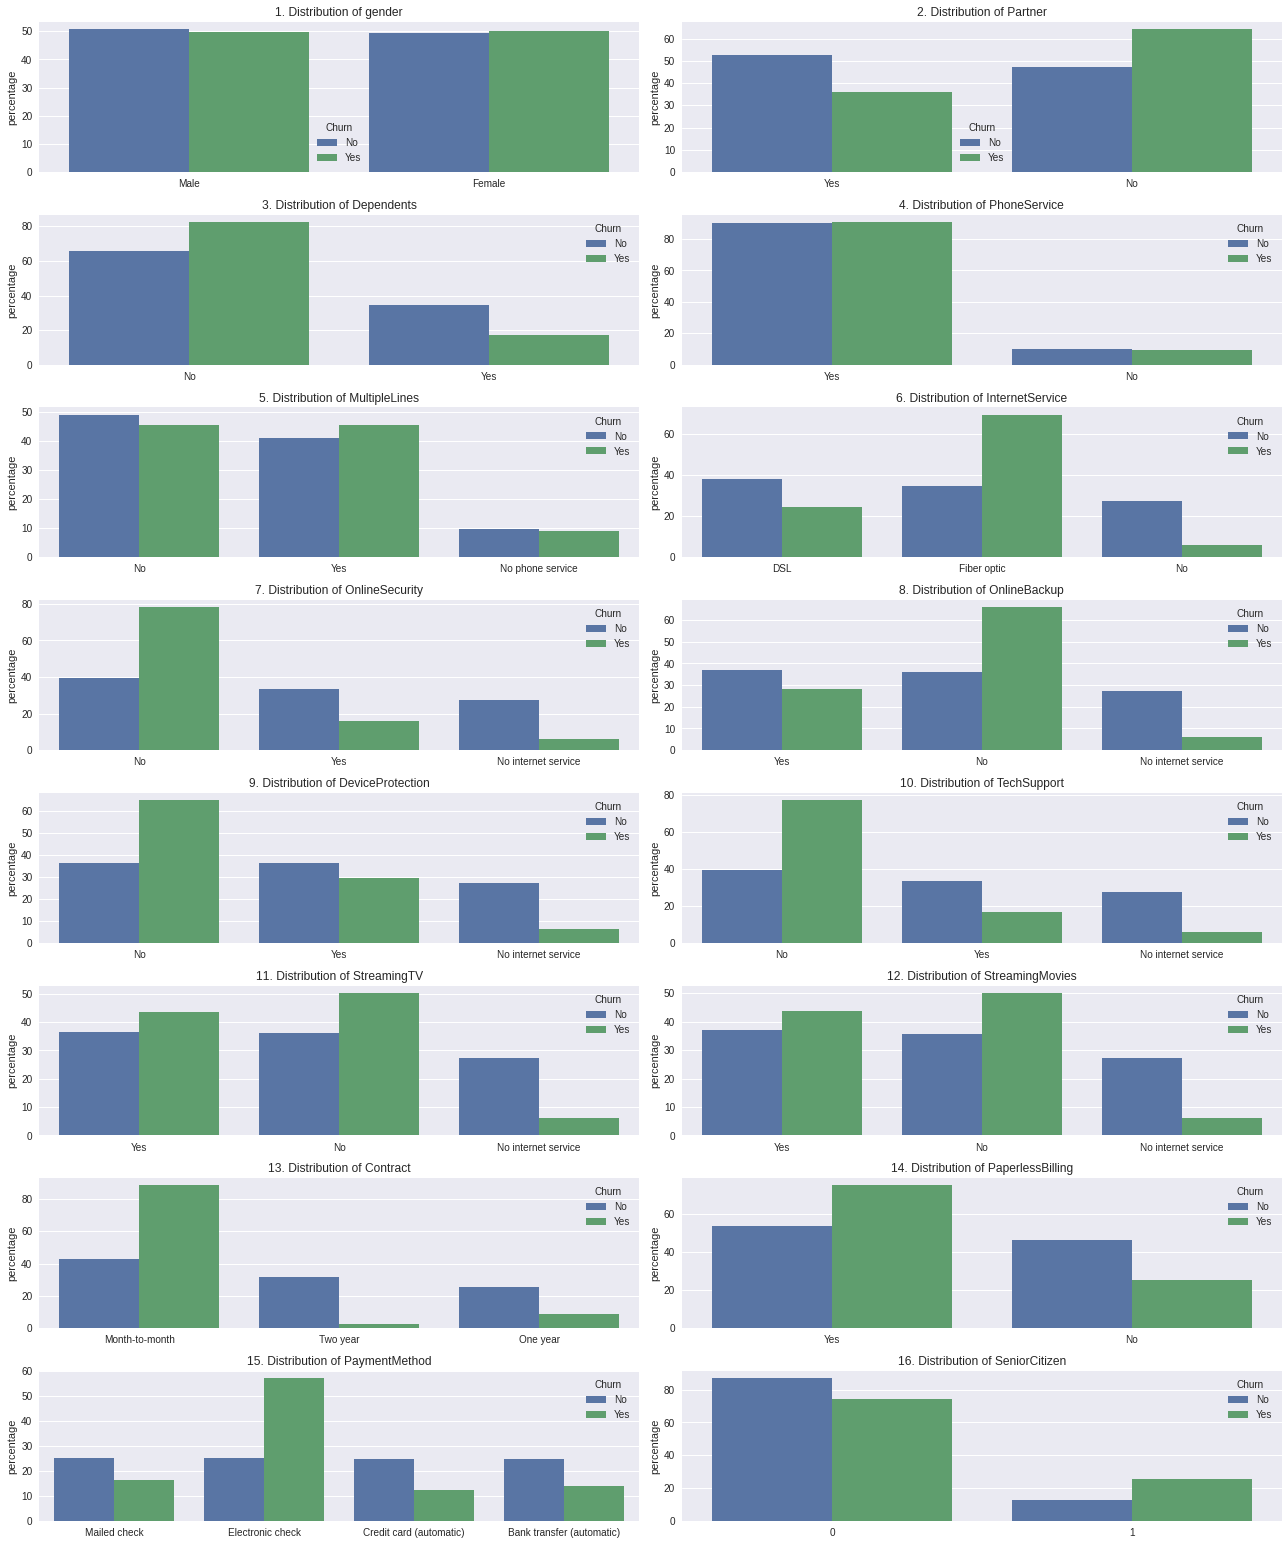

In [16]:
# Define a new figure and its size
fig = plt.figure(1, (18, 24))

# Loop through the "cats" list
for i,cat in enumerate(cats):
    # Make sure we do not use the "Churn" column
    if not cat == "Churn":
        # Create a subplot for the cat
        ax = plt.subplot(9,2,i+1)
        # Count the distribution in values in relation to the Churn column (->.groupby())
        v = original_data[cat].groupby(original_data["Churn"]).value_counts(normalize=True).rename("percentage").reset_index()
        # Use integers for the percentage
        v["percentage"] = v["percentage"] * 100
        # Create the bars for the plot with the data
        sns.barplot(x=cat, y="percentage",hue="Churn", data=v)
        # Set the label for the subplot's x-axis to None
        ax.set_xlabel(None)
        # Give a title to the subplot
        ax.set_title('{}. Distribution of {}'.format(i+1, cat))
        # Adjust the space (padding) between the subplots
        plt.tight_layout()

#Show the figure which contains all subplots
plt.show()

You can see that, for instance, `gender` has less influence on a customer churning than the `Contract` feature.

### 3.2 Dataset Pre-Processing

#### 3.2.1 Value conversions

As studied previously, a lot of columns have categorical variables (yes/no, female/male etc..). We must convert these values to a numerical format. Moreover, we must drop the null values from the `TotalCharges` column.

In [17]:
# Renaming the dataset so as to not create any interference when re-running the code
intermediate_data = original_data.copy()

First, to be able to convert the categorically expressed features to numerically expressed features, some columns take `Yes`, `No` and `No internet service` as values. We can treat `No internet service` as if it were `No` to simplify things:

In [18]:
# These columns contains 'Yes', 'No' and 'No internet service'
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']

# Convert 'No internet service' to 'No' for the above mentioned columns
for i in cols : 
    intermediate_data[i] = intermediate_data[i].replace({'No internet service' : 'No'})

Second, let's deal with the missing values from the `TotalCharges` column. As they are not technically null values (we can assume they consist of a space, " "), we will convert them to NaN values. NaN stands for Not a Number - more info at https://en.wikipedia.org/wiki/NaN.

After this conversion, we can safely drop these NaN values and re-index the column. Lastly, we will make sure all values in the column are floating points (floats) for coherence.

In [19]:
# Replace all the spaces with null values
intermediate_data['TotalCharges'] = intermediate_data["TotalCharges"].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
intermediate_data = intermediate_data[intermediate_data["TotalCharges"].notnull()]
intermediate_data = intermediate_data.reset_index()[intermediate_data.columns]

# Convert 'Total Charges' column values to float data type
intermediate_data["TotalCharges"] = intermediate_data["TotalCharges"].astype(float)

We have just dropped (deleted) the lines in the dataset in which there was a missing value in the `TotalCharges` column. There 11 of these instances, which means that if everything worked out, we now have 11 less lines in the dataset. We had 7043 to start with, and we now should have 7043 - 11 = 7032. Let's verify:

In [20]:
intermediate_data.shape

(7032, 21)

Nearly there! Third, we will use a method to transform categorical values into 0s and 1s. Unfortunately, regression models are, in general, not designed to be trained directly on categorical data and require the attributes to be trained on to be numeric. One simple way to meet this requirement is by applying a technique referred to as **"one-hot" encoding**. Using this encoding technique, we will derive a numerical representation of each of the categorical attribute values. One-hot encoding creates new binary columns for each categorical attribute value present in the original data.

Let's have a look at the example shown in the figure below. The categorical attribute “Student” below contains the names "Tim", "Richard" and "David". We "one-hot" encode the names by creating a separate binary column for each possible name-value observable in the "Student" column. Now, we encode for each transaction that contains the value "Tim" in the "Student" column this observation with 1.0 in the newly created "Tim" column and 0.0 in all other generated name columns.

<img align="center" style="max-width: 600px; height: auto" src="encoding.png">

This can be achieved using the get_dummies() function available in the Pandas data science library. More info on that method at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [21]:
# Perform One Hot Encoding using get_dummies method
df = pd.get_dummies(intermediate_data, columns = cats, drop_first = True)

Note that we renamed our dataframe as 'df' to follow convention :)

Let's now look at the top of our dataframe:

In [22]:
df.head(10)

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,9305-CDSKC,8,99.65,820.50,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1
6,1452-KIOVK,22,89.10,1949.40,1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
7,6713-OKOMC,10,29.75,301.90,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,7892-POOKP,28,104.80,3046.05,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1
9,6388-TABGU,62,56.15,3487.95,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


We can observe that the `get_dummies` method renamed our columns. For instance, `gender` became `gender_Male`. That means that where the customer's value for that column was 'Male', it is now 1 - and where it was 'Female', it is now 0. The transformation also added 5 columns - this is to deal with the fact that some columns contained more than 2 categorical variables. So our dataset should now have 7032 lines and 21 + 5 = 26 columns (features). Let's verify:

In [23]:
df.shape

(7032, 26)

#### 3.2.2 Feature Re-Scaling

As can be seen in the data, all values in the columns are contained in $[0,1]$, except three columns. This is very dangerous because it will give huge and undeserved weights to the values that are not contained in that range when we feed the data to our classifier. We thus need to rescale these values so that they fall into the $[0,1]$ range.

One widley used method of feature re-scaling is referred to as **Min-Max Normalization** and is given by:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Let's re-scale the distinct feature values of the out-of-range columns of our dataframe using **Min-Max Normalization**. We will do so by using the `MinMaxScaler` class of the `sklearn` library:

In [24]:
# Designate the columns that need normalizing
need_scaling = ['tenure','MonthlyCharges','TotalCharges']

It is worth noting here that we do not explicitly have to designate which features need scaling. If the scaler were applied to all features, those with numbers already between 0 and 1 would not be changed. We simply choose to designate the features that need scaling to make sure we get the intuition behind it.

In [25]:
# Choose the scaler
scaler = MinMaxScaler()

# Apply the feature scaling operation on dataset using fit_transform() method
df[need_scaling] = scaler.fit_transform(df[need_scaling])

In [26]:
df.head(10)

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Churn_Yes
0,7590-VHVEG,0.000000,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,0.464789,0.385075,0.215867,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
2,3668-QPYBK,0.014085,0.354229,0.010310,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1
3,7795-CFOCW,0.619718,0.239303,0.210241,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
4,9237-HQITU,0.014085,0.521891,0.015330,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,9305-CDSKC,0.098592,0.809950,0.092511,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1
6,1452-KIOVK,0.295775,0.704975,0.222779,1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
7,6713-OKOMC,0.126761,0.114428,0.032668,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,7892-POOKP,0.380282,0.861194,0.349325,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1
9,6388-TABGU,0.859155,0.377114,0.400317,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


#### 3.2.3 Extraction of Training- and Evaluation-Dataset

We can now create our target variable *y*, which tells us whether the customer has left the company (this is what our model will attempt to predict on the test data), and our feature variable *X* which are all features that need taken into account to predict *y*. We can therefore drop `customerID` and `Churn_Yes` from our dataframe to determine *X*.

In [27]:
#Create Feature variable X and Target variable y
y = df['Churn_Yes']
X = df.drop(['Churn_Yes','customerID'], axis = 1)

Notice that we also dropped `customerID` from our input data $X$. This is because the ID is specific to each customer and has no relationship whatsoever with whether they will churn or not.

The final step of our pre-processing is to make our train/test split. To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Please note, the **evaluation set** (also called test set) will never be shown to the model as part of the training process.

<img align="center" style="max-width: 600px; height: auto" src="train_eval_dataset.png">

We set the fraction of testing records to 30% of the original dataset:

In [28]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearn's train_test_split function:

In [29]:
#Split the data into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = eval_fraction, random_state = random_seed)

Evaluate the training set dimensionality:

In [30]:
X_train.shape, y_train.shape

((4922, 24), (4922,))

Evaluate the evaluation set dimensionality:

In [31]:
X_test.shape, y_test.shape

((2110, 24), (2110,))

### 3.3 Logistic Regression Classification

<img align="center" style="max-width: 600px; height: auto" src="architecture_pipeline.png">

Basic Logistic Regression architecture - from a dataset with features and a target variable, compute a decision boundary based on training data, which will be used to predict the target value of yet unseen (test) data.

#### 3.3.1 Theoretical background

Logistic Regression builds on the concepts of Linear Regression, where the model produces a linear equation relating the input features $X$ - the **independent** variables - to the target - **dependent** - variable $Y$. In our case, $X$ are all the features in the dataset except `Churn_Yes` and `customerID`, while $Y$, the target variable, is `Churn_Yes`. Remember, we aim at building a model that understands the relationships between these variables to be able to predict which of our future customers will leave.

In Logistic Regression, the target variable is a discrete value (0 or 1), unlike a continuous value as in the case of Linear Regression. To get that discrete variable (e.g. 0 or 1), one must use an **activation function** (see below). The equation built by the model focuses of separating the various discrete values of target — trying to identify a line such that all 1’s fall on one side of the line and all 0’s on the other.

The main **equation** behind Logistic Regression is as follows:

$$s = w_{1}x_{1} + w_{2}x_{2} + ... + w_{d}x_{d} + b$$

$$ŷ = H(s)$$

Where 
- $s$ is a score. It is a value that can range from $- \infty$ to $\infty$ and is the result of classic regression.
- $ŷ$ is a continuous value between $[0,1]$. It is the output and can be regarded as a probability.
- $w_{x}$ are weights given to the different feature
- $b$ is a bias value
- $H$ is an activation function
- $d$ is the number of features (columns) in our input data

This means that for each instance of the data (each customer), we compute $s$, a continuous and unbounded value, which corresponds to the prediction we would compute in Linear Regression. To calculate $s$, we assign weights to the features (gender, payment method etc..) and a bias. This is as simple as a linear equation $y = wx + b$, where we have a slope and an intercept. The only difference is that we call them weights (given to each feature) and the bias.

It is quite intuitive that we must give weights to the different features because as we saw, some features have less impact on a customer churning than others. For instance, it is a reasonable assumption that the `gender` feature is given less weight than the `Contract` feature (as seen in *3.1.1 Data Visualization*).

To get $ŷ$, our discrete variable which lets us know if the customer has churned, we must feed $s$ to an activation function $H()$. The purpose of the activation function is to convert the score $s$ into a probability. To do so, the score $s$ is transformed into a vlue between $[0,1]$, which can be considered a probability. Then, the actual decision is made according to a threshold, generally *0.5*. For instance, if $ŷ = 0.7$, we will see that *$ŷ$ > threshold* and we will consider it equal to *1* as a result (meaning the customer has left, in our case).

We can distinguish several **steps** in the Logistic Regression algorithm. Here's an overview:

1. Assign random values to the weights $w$ and the bias $b$.
2. Calculate $s$ and $ŷ$ given these weights and the bias.
3. Calculate the loss (how far off are these results from the actual values).
4. Compute the gradients for the weights and the bias to know how to adjust the values that we initially set at random.
5. Update the weights and the bias until we get satisfactory results, while avoiding overfitting.

Steps 3 to 5 are done repeatedly until the algorithm gets the desired results.

#### 3.3.2 Activation function

The **activation function** allows us to obtain continuous values bounded between $[0,1]$ from the original score $s$. It is then what makes it possible to use regression for classification! **Linear Regression** does not work for classification because it outputs continuous values that are not bounded between $[0,1]$ - that is why you can predict e.g. stock prices (which are continuous) but not classes (which are discrete, e.g. binary) with Linear Regression.

The activation function, which is simply a **sigmoidal** (*S*-shaped) function, translates $s$ into a value in $[0,1]$ that we call ŷ, which in turn allows the those values to be compared with a threshold (0.5). If the value of $ŷ$ is higher than the threshold, we will give it the discrete value *1*, and if it is below the threshold, we will assign it a value of *0*. Here is the equation for the *logistic function* (one function we can use as our sigmoidal activation function):

$$H(s) = {\frac  {1}{1+e^{-s}}}$$

Below is a graph of an example of a sigmoid function - the logistic function.

<img align="center" style="max-width: 600px; height: auto" src="sigmoid.png">

As can be seen, the sigmoid function intersects with the y-axis at $y = 0.5$, i.e. the threshold.

A very useful property of the activation function is that it is **differentiable**. We will use this property when using **gradient descent** when we want to update our initially random weights.

Another great feature of the sigmoidal activation function is that not only it helps us decide which class to give to the input, it also tells us how good our prediction was. A prediction of 0.9 for a customer that is leaving (Churn = 1) is better than a prediction of 0.7.

#### 3.3.3 Loss calculation

After getting our first result for $ŷ$, we can start adjusting our weights so that $ŷ$ gets closer to its real value $y$. To do that, we must first learn how badly we performed. This can be done with a loss function, where we compare our prediction with the actual value. We want a function that outputs a large loss when our assumptions provide a value close to 0 while the actual is 1, and vice-versa.

One function that we can use for the purpose is called the Log Loss function (also known as the Binary Cross-Entropy). It is defined as:

$$L = -\frac {1}{N}\sum_{i=1}^\infty y_{i}*log(ŷ_{i}) + (1-y_{i})*log(1-ŷ_{i})$$

Where $N$ is the number of instances in the data. If we are only applying the loss function to one instance of the data, we can simplify as:

$$L = -y*log(ŷ) - (1-y)*log(1-ŷ)$$

Let's visualize this function to understand it a bit better. The goal of Log Loss is to punish predictions that were way off, so that we know we need to diminish the loss by updating our parameters. The function looks different for predictions where the real value, $y$, is $y = 1$ or $y = 0$. Let's start by $y = 1$. The function looks as follows:

<img align="center" style="max-width: 600px; height: auto" src="logloss_y1.png">

Because $y = 1$, only the first term of our equation matters, as the second one is multiplied by 0. $L = -y*log(ŷ) - (1-y)*log(1-ŷ)$ so $L_{y=1} = -1*log(ŷ) - (1-1)*log(1-ŷ)$ so $L_{y=1} = -1*log(ŷ)$. That means that as the predicted value approaches 0, the loss increases exponentially (because we want our predicted value to approach 1). If the predicted value is close to 1, the loss is very small.

By the same logic, the loss function for $y = 0$ is different:

<img align="center" style="max-width: 600px; height: auto" src="logloss_y0.png">

Because $y = 0$, our loss function is reduced to $L_{y=0} = -1*log(1-ŷ)$, as the first term is multiplied by 0. Accordingly, the loss function gives greater loss for predictions approaching 1, and very little loss for predictions close to 0.

When training the model, we want to find parameters $w∗$, $b∗$ that minimize the total loss across all training examples:

$$w*, b* = argmin_{\mathbf{w, b}} L(w,b)$$

#### 3.3.4 Example with steps

For our simple example, let us imagine a scenario where our inputs are how comfortable students are in *Maths* and in *Business Innovation*, and how that affects their success in a *Machine Learning* class.

5 HSG students grade their level of comfort in maths and in business innovation on a scale from 1 to 10, and we compare that with whether they passed the *Machine Learning* exam or not (1 for a pass, 0 for a fail).

$X_{1}$ represents the level of comfort in maths, $X_{2}$ the level of comfort in business innovation and $Y$ whether the student has passed the ML exam.

<img align="center" style="max-width: 600px; height: auto" src="student_example.png">

Note: we will conduct this example as if we had mini-batches of size 1 (one row at a time) for simplicity.

**Step 1 - Assign random values to the weights and the bias**

We can randomly assign a weight $w_{1}$ to $X_{1}$ and a weight $w_{2}$ to $X_{2}$. Let's also give a value to the bias $b$.

Random values: 
- $w_{1} = 0.5$
- $w_{2} = -0.5$
- $b = 0$

**Step 2 - Calculate $s$ and $ŷ$ given these weights and the bias**

Ok, let's take our first student to see what happens with the first row of our example data.

$s = 0.5 * 8 + (-0.5)*6 + 0 = 1$

$ŷ = H(s) = {\frac  {1}{1+e^{-1}}} = 0.7311$

**Step 3 - Calculate the loss**

$loss = -1*log(0.7311) - (1-1)*log(1-0.7311) = 0.136$

**Step 4 - Calculate the gradients**

We must calculate the gradient of each of our parameters (weights and bias) with respect to the loss. These will indicate how much we must change our parameters to reduce the loss and thus get our predicted values closer to the actual ones.

$\frac {∂loss}{∂w_{1}}= (ŷ-y)*X_{1} = (0.7311-1)*8=-2.1515$

$\frac {∂loss}{∂w_{2}}= (ŷ-y)*X_{2} = (0.7311-1)*6=-1.6136$

$\frac {∂loss}{∂b}= (ŷ-y)*1 = (0.7311-1)*1=-0.2689$

In our case, the gradients turn out to be negative, so we will have to **increase** our parameters' values. The gradient of $w_{1}$ is larger than that of $b$, which means that the adjustment needed for $w_{1}$ is more important. The gradients give us the direction and scope of the change needed.

**Step 5 - Update the weights and the bias**

The model trains on one instance (student) at a time. Because that student's data is different from another's, we must limit the impact the loss on this individual instance has on our parameters (which are shared for all students). To that end,  we adopt a *learning rate η* to scale the gradients to e.g. a tenth of their value.

$w_{1} = w_{1} - η*\frac {∂loss}{∂w_{1}}=0.5-0.1*(-2.1515)=0.7151$

$w_{2} = w_{2} - η*\frac {∂loss}{∂w_{2}}=-0.5-0.1*(-1.6136)=-0.339$

$b = b - η*\frac {∂loss}{∂b}=0-0.1*(-0.2689)=0.0269$

Updating the weights and the bias is an iterative process which will be repeated for either a fixed number of times or until the loss converges. Some instances in the data may pull the weights and the bias in opposite directions. A decision boundary between the classes is therefore built by these forces.

**2nd iteration**

If we continue the same process with the next line in our small dataset, we will again update our parameters a little:

<img align="center" style="max-width: 600px; height: auto" src="student_example2.png">

$s = 0.7151*9 + (-0.339)*2 + 0.0269 = 5.7848$

$ŷ = H(s) = {\frac  {1}{1+e^{-5.7848}}} = 0.9969$

$loss = -1*log(0.9969) - (1-1)*log(1-0.9969) = -0.00135$

$\frac {∂loss}{∂w_{1}}= (ŷ-y)*X_{1} = (0.9969-1)*9=-0.0279$
$\frac {∂loss}{∂w_{2}}= (ŷ-y)*X_{2} = (0.9969-1)*2=-0.0062$
$\frac {∂loss}{∂b}= (ŷ-y)*1 = (0.9969-1)*1=-0.0031$

$w_{1} = w_{1} - η*\frac {∂loss}{∂w_{1}}=0.7151-0.1*(-0.0279)=0.71789$
$w_{2} = w_{2} - η*\frac {∂loss}{∂w_{2}}=-0.339-0.1*(-0.0062)=-0.3384$
$b = b - η*\frac {∂loss}{∂b}=0.0269-0.1*(-0.0031)=0.0272$

Our loss was even less important here and we only had to adjust our parameters a little. Looks good!

Now let's **test** these parameters on the third row of the data:

<img align="center" style="max-width: 600px; height: auto" src="student_example3.png">

$s = 0.71789*7 + (-0.3384)*3 + 0.0272 = 4.0372$

$ŷ = H(s) = {\frac  {1}{1+e^{-4.0372}}} = 0.9826$

That is really close to the actual value *1*!
Now let's do the same for our 4th student, who failed the *ML* exam:

<img align="center" style="max-width: 600px; height: auto" src="student_example4.png">

$s = 0.71789*2 + (-0.3384)*8 + 0.0272 = -1.2442$

$ŷ = H(s) = {\frac  {1}{1+e^{1.2442}}} = 0.2237$

Again it accurately predicted the class, as 0.2237 is lower than the threshold 0.5.

This small example is largely based on https://towardsdatascience.com/under-the-hood-logistic-regression-407c0276c0b4

#### 3.3.5 Classification with 2 feature input

We are now going to use only a subset of our data to make customer churn predictions. We will only use two columns of the data (two features). The goal is to be able to visualize the decision boundary that Logistic Regression creates to separate the two classes - namely churn or no churn. Plotting the decision boundary is with only two features is best for understanding what is happening through visualization.

In order to be able to see the data points around the decision boundary, let's choose two columns that have continuous values instead of discrete ones. For instance, let's select `tenure` and `MonthlyCharges` as input features.

In [32]:
X_small = df[['tenure', 'MonthlyCharges']]

This small dataframe should have 7'032 lines and only 2 columns. Let's verify:

In [33]:
X_small.shape

(7032, 2)

We can now split our small example of data between a training set and an evaluation set:

In [34]:
#Split the data into training set (70%) and test set (30%)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y, test_size = eval_fraction, random_state = random_seed)

Let's quickly instantiate our Logistic Regression model and fit - or 'train' it on - the training data. More details on this later.

In [35]:
# Choose our classifier, namely Logistic Regression
clf_small = LogisticRegression(random_state=random_seed)

# Fit the logistic Regression Model
clf_small.fit(X_train_small,y_train_small)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that we have trained the model on our input data, we can create a grid on which we visualize our input data over the decision boundary. This is helpful when trying to understand how the model separates the classes.

In [36]:
# Create a grid of numbers that cover all potential number combinations between -0.2
# and 1.2 (could have chosen 0 and 1 but it's nicer on the plot) at 0.1 intervals
xx, yy = np.mgrid[-0.2:1.2:.01, -0.2:1.2:.01]

# Making a grid out of those numbers, which are created as 2D arrays
grid = np.c_[xx.ravel(), yy.ravel()]

We now calculate the probability that these combinations would lead to `Churn`, given the parameters our model has found from when we trained it. To this end, we use the `predict_proba()` method.

In [37]:
probs = clf_small.predict_proba(grid)[:, 1].reshape(xx.shape)

We now transform our input data (which are currently dataframes) into numpy arrays, which will enable us to scatter them on a plot.

In [38]:
X_train_array = X_train_small.to_numpy()
y_train_array = y_train_small.to_numpy()

Finally, we create a plot that shows the decision boundary. The clients are scattered around it according to their feature values. We only look at 200 clients, because the plot would get very messy if we tried to see all 7'032! You can also see the degree of confidence our classifier had with the nuances of colour. For this, look at the probability column on the right.

[(-0.2, 1.2), Text(0, 0.5, '$X_2$'), (-0.2, 1.2), Text(0.5, 0, '$X_1$'), None]

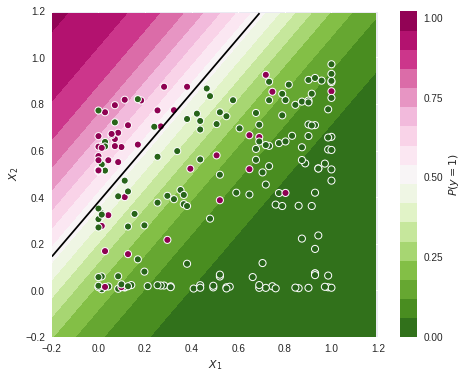

In [39]:
# Define figure and figure size
figure, ax = plt.subplots(figsize=(8, 6))

# Define the contour frame - made with all values and the churn probabilities
contour = ax.contourf(xx, yy, probs, 16, cmap="PiYG_r",
                      vmin=0, vmax=1)

# Add the color bar on the right
ax_c = figure.colorbar(contour)
# Name the color bar's label
ax_c.set_label("$P(y = 1)$")
# Define the color bar's ticks
ax_c.set_ticks([0, .25, .5, .75, 1])

# Scatter our training data on the graph
ax.scatter(X_train_array[:200,0], X_train_array[:200, 1], c=y_train_array[:200], s=50,
           cmap="PiYG_r",
           edgecolor="white", linewidth=1)

# Determine and plot decision boundary
Z = clf_small.decision_function(grid).reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Limits of the axes and labels
ax.set(aspect="equal",
       xlim=(-0.2, 1.2), ylim=(-0.2, 1.2),
       xlabel="$X_1$", ylabel="$X_2$")

As can be seen around the decision boundary, the classifier does okay to recognize clients who do not churn, but has more trouble recognizing those who do. The decision boudary is set at the 0.5 threshold (standard practice) - this is done automatically by the `sklearn` library we are using. If we were to change that threshold, the boundary would shift, e.g. to the right if the threshold were decreased. This would change the balance between precision and recall - the desirability of which is case-dependent.

Out of curiosity, let's see how well the classifier performed, in terms of accuracy, on this reduced dataset.

In [40]:
#Predict the value for new, unseen data
pred_small = clf_small.predict(X_test_small)

In [41]:
# Find Accuracy using accuracy_score method
accuracy = round(metrics.accuracy_score(y_test_small, pred_small) * 100, 2)
print('Small classifier accuracy on test data:', accuracy, '%')

Small classifier accuracy on test data: 77.49 %


### 3.4 Classification on the whole dataset

Luckily, the `Scikit-Learn` (https://scikit-learn.org) machine learning library provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. Among others the library also contains a variety of supervised classification algorithms such as the **Logistic Regression** classifier. The Logistic Regression classifier can be trained "off-the-shelf" to solve the mathematical task formulated above. Let's instantiate a Logistic Regression classifier:

In [42]:
# Instantiate the model
clf = LogisticRegression(random_state=random_seed)

Train or fit the Logistoc Regression classifier using the training dataset features and labels:

In [43]:
# Fit the logistic Regression Model
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Out of interest, we can have a look at the weights $w$ the algorithm found for the different features, as well as the bias $b$ (intercept):

In [44]:
# Weights given to the different features
print(clf.coef_)

# Bias (intercept)
print(clf.intercept_)

[[-3.12643913  0.02799938  1.20337713 -0.02304222  0.12114717 -0.25568012
  -0.24616979  0.2277326   0.2040262   0.88243742 -0.75759426 -0.39234627
  -0.08139916 -0.0279208  -0.35599995  0.24644004  0.24916517 -0.82251069
  -1.38073827  0.20880091 -0.15734584  0.2198731  -0.07773931  0.22064646]]
[-0.29877187]


## 4. Evaluation

### 4.1 Metrics and Confusion Matrix

After fitting the training data, the optimal decision boundary learned by the Logistic Regression model can then be used to predict the corresponding class labels (churn vs no churn) of so far unknown observations. We will utilize the trained model to predict the class labels of the remaining observations contained in the evaluation dataset:

In [45]:
# Predict the value for new, unseen data
pred = clf.predict(X_test)

Let's have a look at the predicted values (where 1 = churn and 0 = no churn):

In [46]:
print(pred)

[0 0 1 ... 0 0 0]


As well as the true values:

In [47]:
# Convert y_test to a list
true = y_test.values.tolist()

print(true)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [48]:
# Find Accuracy using accuracy_score method
accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
print('Classifier accuracy on test data:', accuracy, '%')

Classifier accuracy on test data: 79.57 %


Determine and plot the **confusion matrix** of the individual predictions:

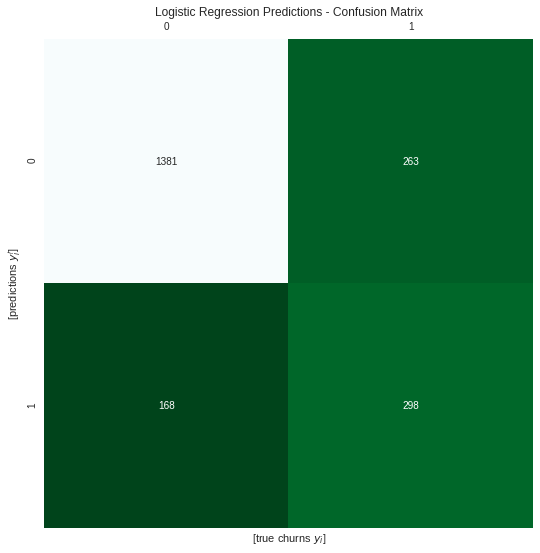

In [49]:
# Confusion matrix
mat = confusion_matrix(y_test, pred)

# Init the plot
plt.figure(figsize=(9, 9))

# Plot confusion matrix heatmap
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# Choose where to display our ticks
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# Add plot axis labels
plt.xlabel('[true churns $y_{i}$]')
plt.ylabel('[predictions $y_{i}\'$]')

# Add plot title
plt.title('Logistic Regression Predictions - Confusion Matrix')

plt.show()

The confusion matrix shows that most of the success of our classifier comes from the correct no churn predictions. Let's further analyze this using the classification report.

Remember that as part of the class you learned about several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Prescision** corresponds to the proportion of positive predictions that are correct. As shown by the confusion matrix and highlighted by the classification report, precision is much higher for customers who stayed than customers who churned. **Recall**, which represents the proportion of positives that are correctly predicted, shows an even larger gap in our classifier's performance between the customers who actually churn and those who do not. One reason our model has higher success on the customers who stay may simply be the higher amount of customers who stay than customers who leave in the dataset.

### 4.2 Different threshold values

The Logistic Regression model outputs probabilities that the different customers have churned and classifies those who have a probability above the 0.5 (50%) threshold as churning. The `sklearn` library from which we borrowed the Logistic Regression classifier automatically uses 0.5 as threshold value (this is common practice). What happens if we change the threshold? Let's see how different thresholds change the prediction decisions. We shall choose threshold values of value of 20%, 50% and 80%, or in other terms: $t = [0.2, 0.5, 0.8]$.

In [51]:
# Predicted probabilities
y_pred = clf.predict_proba(X_test)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Creating new column 'predicted' with 1 if Churn_Prob>0.2 else 0
y_pred_final['Predictions for t = 0.2'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['Predictions for t = 0.5'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Creating new column 'predicted' with 1 if Churn_Prob>0.8 else 0
y_pred_final['Predictions for t = 0.8'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head of y_pred_final
y_pred_final.head(20)

,Churn_Yes,Churn_Prob,Predictions for t = 0.2,Predictions for t = 0.5,Predictions for t = 0.8
0,0,0.010004,0,0,0
1,0,0.138566,0,0,0
2,1,0.698436,1,1,0
3,0,0.141888,0,0,0
4,0,0.340598,1,0,0
5,0,0.428976,1,0,0
6,0,0.124573,0,0,0
7,0,0.746150,1,1,0
8,0,0.231715,1,0,0
9,0,0.021564,0,0,0


The 80% threshold obviously predicts less churns, since it has higher criteria. Let's see how the different thresholds affect the model's accuracy:

In [52]:
# Create a list with the threshold values we used in the dataframe
threshold_values = [0.2, 0.5, 0.8]

# Loop through threshold_values list
for i in threshold_values:
  # Convert predictions for that threshold to a list
  pred = y_pred_final['Predictions for t = {}'.format(i)].tolist()
  # Find Accuracy using accuracy_score method
  accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
  print('Classifier accuracy on test data for threshold = {}: '.format(i), accuracy, '%')

Classifier accuracy on test data for threshold = 0.2:  70.0 %
Classifier accuracy on test data for threshold = 0.5:  79.57 %
Classifier accuracy on test data for threshold = 0.8:  73.98 %


We can also examine the **Receiver Operating Characteristic (ROC) Curve** from our Logistic Regression classification. This curve compares the True-Positive rate **TPR** with the False-Positive rate **FPR**. Let's plot the ROC Curve for each threshold to see the effect they have on the decisions.

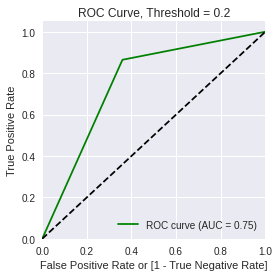

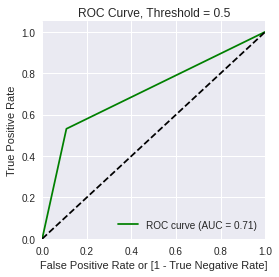

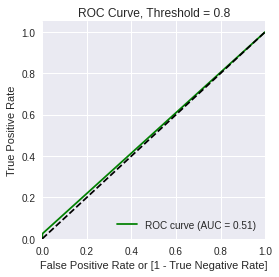

In [53]:
# Loop through threshold_values list
for i in threshold_values:

    # For each theshold column, get the fpr, tpr and threshold from sklearn metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn_Yes, y_pred_final['Predictions for t = {}'.format(i)],
                                              drop_intermediate = False)
    
    # Area Under the Curve score
    auc_score = metrics.roc_auc_score(y_pred_final.Churn_Yes, y_pred_final['Predictions for t = {}'.format(i)])

    # Create the plot
    plt.figure(figsize=(4, 4))
    
    # Draw the curve and define the legend
    plt.plot(fpr, tpr, label='ROC curve (AUC = {})'.format(auc_score.round(2)), c='green')
    # Draw the diagonal
    plt.plot([0, 1], [0, 1], 'k--')
    # Set the limits of the axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # Label titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    # Title
    plt.title('ROC Curve, Threshold = {}'.format(i))
    # Place legend at lower right of figure
    plt.legend(loc="lower right")

    plt.show()

    # Throw an empty line between each figure for clarity
    print()
    print('\n')

A couple things might be worth noting here. First, the Area Under the Curve (AUC) is higher for $t = 0.2$ than for the other $t$ values, despite highest accuracy belonging to $t = 0.5$. This might seem counter-intuitive at first, but both values are not directly comparable and do not work in the same way. For instance, if the huge majority (say 90%) of the real labels are 0s (no churn), and our classifier naively classifies all samples as 0s, it will get 90% accuracy. However, we might get a very low AUC score (maybe close to 0.5.). The AUC score tells us how well the classifier is able to distinguish between the different classes. This example is similar to what happens when $t = 0.8$. When $t = 0.8$, accuracy is decent because predictions are mostly 0s, and the majority of samples are actually 0s. But the classifier is actually bad at distinguishing the two classes, so the AUC is low. The AUC is a very relevant measure.

Second, what do the different shapes of the ROC curves imply? The point at which the green line changes direction is the point at which we get the distribution of True Positives **TP** and False Positives **FP**. We can see that for $t = 0.2$, we have a higher **TP** rate but also a higher **FP** rate than for $t = 0.5$. This is to be expected, as the lower theshold value simply classifies more predictions as positive.

We might then want to think about that - should we aim to have a high **TP** rate, at the risk of having a high **FP** rate? Or should we instead aim at minimizing the **FP** rate? This will depend on the task at hand.

## 5. Exercises

We recommend you to try the following exercises as part of the lab:

**1. Try different evaluation fractions on the dataset, and have a look at the differences in accuracy results.**

Write a Python loop in which you fit and predict the data with the Logistic Regression classifier for different values of the `eval_fraction`. For each iteration, print the accuracy result. You can for instance try to set the evaluation fraction to 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 and 0.7.

In [54]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Try different scalers to normalize the data**

We used the sklearn's `MinMaxScaler()` to normalize our data. However, sklearn offers several scalers (see https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing). Use another scaler, such as the `StandardScaler` and visualize the dataframe. Notice anything different?

In [55]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**3. Think about whether either of recall and precision matters more for this prediction task**

The task at hand might change whether the predictor cares more about precision or recall. For instance, when detecting cancer, recall is more important because you want to avoid False Negatives. For YouTube recommendations, the inverse might hold true.

## 6. Lab Summary:

In this lab, a step by step introduction into **Logistic Regression** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [56]:
# installing the nbconvert library
!pip install nbconvert
!pip install jupyter_contrib_nbextensions

Let's now convert the Jupyter notebook into a plain Python script:

In [57]:
!jupyter nbconvert --to script aiml_lab_03.ipynb

[NbConvertApp] WARNING | pattern u'aiml_lab_03.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run n

## 7. References

- Main source (basis of the code):

>- https://github.com/nitinkaushik01/Deep_and_Machine_Learning_Projects/blob/master/Churn_Prediction_of_Customers/Customer_Churn_Prediction.ipynb and corresponding video: https://www.youtube.com/watch?v=j5WJDimjgLg

- Other sources:

>- Theory: https://towardsdatascience.com/under-the-hood-logistic-regression-407c0276c0b4

>- Pre-processing: https://github.com/sercandogan/churn-telco/blob/master/Churn%20Analysis.ipynb

>- ROC Curve: https://www.nucleusbox.com/building-a-logistic-regression-model-in-python/

>- Decision boundary: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

>- Mathematical notation: Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2020). Dive into Deep Learning. Available at https://d2l.ai/index.html